# SKLearn and Quandl API refrence

## SKLearn PCA Examples  
##### SKLearn PCA Source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 
### Import Iris Dataset

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Normalizing Dataset
Normalize the set to a mean of 0 and a variance of 1

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = df.loc[:,['target']].values

print(x[0:9])
print(y[0:9])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]]
[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]


### PCA projected to 2 components  

In [5]:
# initalize SK PCA object to project in 2 components
pca = PCA(n_components=2)

# PCA call on data
principalComponents = pca.fit_transform(x)

# format results into dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(10)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


##### Matplot Sources: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html 

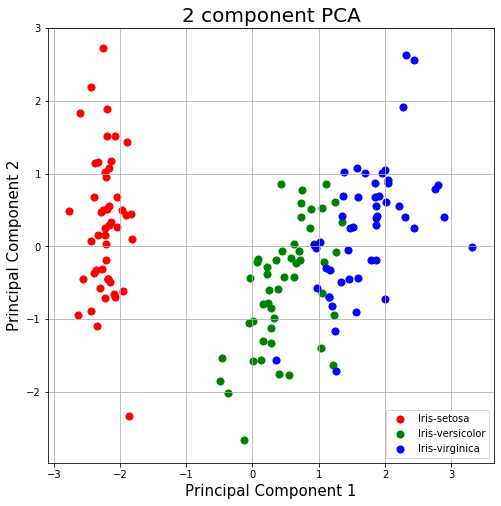

In [6]:
# plotting data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA projected to 3 components

In [7]:
# initalize SK PCA object to project in 2 components
pca = PCA(n_components=3)

# PCA call on data
principalComponents = pca.fit_transform(x)

# format results into dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2', 'component 3'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(10)

,component 1,component 2,component 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa
5,-2.070537,1.518549,0.030684,Iris-setosa
6,-2.445711,0.074563,0.342198,Iris-setosa
7,-2.233842,0.247614,-0.082574,Iris-setosa
8,-2.341958,-1.095146,0.153562,Iris-setosa
9,-2.188676,-0.448629,-0.246560,Iris-setosa


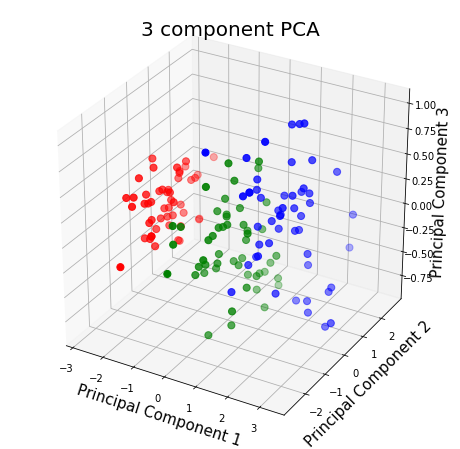

In [8]:
# plotting data
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , finalDf.loc[indicesToKeep, 'component 3']
               , c = color
               , s = 50)

# Quandl API Example
##### Quandl Sources: https://docs.quandl.com/docs/python-tables

In [3]:
import quandl
quandl.ApiConfig.api_key = 'k4yGHkTF59h4ueMXmsst'

### Import Quandl Timeseries Data

In [24]:
data = quandl.get("EOD/MSFT", returns="pandas")
data.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.07,31.29,31.880,154507000.0,0.0,1.0,27.634552,27.913074,27.234178,27.747702,154507000.0
2013-09-04,31.3900,31.47,31.11,31.195,142320600.0,0.0,1.0,27.321216,27.390846,27.077509,27.151492,142320600.0
2013-09-05,31.1000,31.44,30.95,31.235,71644900.0,0.0,1.0,27.068806,27.364735,26.938249,27.186307,71644900.0
2013-09-06,31.3100,31.39,31.13,31.152,75434900.0,0.0,1.0,27.251585,27.321216,27.094917,27.114065,75434900.0
2013-09-09,31.2208,31.79,31.20,31.655,49628500.0,0.0,1.0,27.173947,27.669367,27.155844,27.551866,49628500.0


In [23]:
data = quandl.get("EOD/AAPL", start_date="2016-12-1", end_date="2016-12-31", returns="pandas")
data.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-12-01,110.365,110.94,109.03,109.49,37086862.0,0.0,1.0,105.416210,105.965427,104.141072,104.580446,37086862.0
2016-12-02,109.170,110.09,108.85,109.90,26527997.0,0.0,1.0,104.274794,105.153541,103.969143,104.972061,26527997.0
2016-12-05,110.000,110.03,108.25,109.11,34324540.0,0.0,1.0,105.067577,105.096232,103.396047,104.217485,34324540.0
2016-12-06,109.500,110.36,109.19,109.95,26195462.0,0.0,1.0,104.589997,105.411435,104.293898,105.019819,26195462.0
2016-12-07,109.260,111.19,109.16,111.03,29998719.0,0.0,1.0,104.360759,106.204217,104.265243,106.051392,29998719.0


### Pandas Dataframe Manipulation Examples

In [18]:
data[data['Dividend'] > 0.0].head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-11-19,36.85,37.230,36.67,36.74,44275000.0,0.28,1.0,32.317924,32.651189,32.160062,32.221453,44275000.0
2014-02-18,37.63,37.780,37.41,37.42,32834000.0,0.28,1.0,33.248936,33.381472,33.054549,33.063385,32834000.0
2014-05-13,39.92,40.500,39.85,40.42,27004800.0,0.28,1.0,35.516664,36.032688,35.454385,35.961512,27004800.0
2014-08-19,44.97,45.340,44.83,45.33,28139500.0,0.28,1.0,40.256765,40.587986,40.131438,40.579034,28139500.0
2014-11-18,49.13,49.325,48.70,48.74,23996457.0,0.31,1.0,44.260492,44.436165,43.873111,43.909147,23996457.0


In [20]:
data[['Open', 'Close']].head(5)

,Open,Close
Date,,
2013-09-03,31.7500,31.880
2013-09-04,31.3900,31.195
2013-09-05,31.1000,31.235
2013-09-06,31.3100,31.152
2013-09-09,31.2208,31.655


# Combining SKLearn PCA with Quandl Data

##### Example of PCA analysis of example stocks:INTC, CSCO, IBM, V, BAC, JPM, AXP

In [28]:
startDate = "2016-6-1"
endDate = "2016-8-31"
intcStock = quandl.get("EOD/INTC", start_date=startDate, end_date=endDate, collapse="weekly", returns="pandas")
cscoStock = quandl.get("EOD/CSCO", start_date=startDate, end_date=endDate, collapse="weekly", returns="pandas")
ibmStock = quandl.get("EOD/IBM", start_date=startDate, end_date=endDate, collapse="weekly", returns="pandas")
vStock = quandl.get("EOD/V", start_date=startDate, end_date=endDate, collapse="weekly", returns="pandas")
jpmStock = quandl.get("EOD/JPM", start_date=startDate, end_date=endDate, collapse="weekly", returns="pandas")
axpStock = quandl.get("EOD/AXP", start_date=startDate, end_date=endDate, collapse="weekly", returns="pandas")

In [41]:
intcStock.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-06-05,31.74,31.740,31.395,31.62,15777539.0,0.0,1.0,28.945147,28.945147,28.630526,28.835713,15777539.0
2016-06-12,31.70,32.240,31.650,32.04,35749113.0,0.0,1.0,28.908669,29.401119,28.863072,29.218730,35749113.0
2016-06-19,31.73,31.810,31.470,31.76,27047860.0,0.0,1.0,28.936027,29.008983,28.698922,28.963386,27047860.0
2016-06-26,31.80,32.320,31.400,31.55,38094301.0,0.0,1.0,28.999864,29.474075,28.635085,28.771877,38094301.0
2016-07-03,32.64,32.885,32.470,32.75,17084570.0,0.0,1.0,29.765898,29.989324,29.610867,29.866212,17084570.0


In [69]:
stockIndexs = ['INTC','CSCO','IBM','V','JPM','AXP']
stockCloses = pd.DataFrame(data = [intcStock['Close'], cscoStock['Close'], ibmStock['Close'], vStock['Close'], jpmStock['Close'], axpStock['Close']], index = stockIndexs)

logReturns = (1 - (stockCloses.transpose() / stockCloses.iloc[:,0])).transpose()
logReturns

Date,2016-06-05 00:00:00,2016-06-12 00:00:00,2016-06-19 00:00:00,2016-06-26 00:00:00,2016-07-03 00:00:00,2016-07-10 00:00:00,2016-07-17 00:00:00,2016-07-24 00:00:00,2016-07-31 00:00:00,2016-08-07 00:00:00,2016-08-14 00:00:00,2016-08-21 00:00:00,2016-08-28 00:00:00,2016-09-04 00:00:00
INTC,0.0,-0.013283,-0.004428,0.002214,-0.035737,-0.075269,-0.109108,-0.096142,-0.102467,-0.106262,-0.093295,-0.114485,-0.115117,-0.135041
CSCO,0.0,0.003433,0.006179,0.047374,0.011329,-0.004463,-0.023687,-0.054240,-0.048060,-0.065568,-0.059732,-0.047717,-0.076210,-0.079300
IBM,0.0,0.003401,0.005887,0.041206,0.003532,-0.010269,-0.045065,-0.060043,-0.050559,-0.069396,-0.059258,-0.046766,-0.035516,-0.039178
V,0.0,-0.003002,0.036903,0.061171,0.068301,0.044033,0.020515,0.000375,0.023643,-0.002502,-0.001001,-0.006630,-0.007881,-0.012009
JPM,0.0,0.012376,0.036510,0.077970,0.052290,0.043472,0.007116,0.009282,0.010365,-0.025681,-0.010520,-0.018874,-0.024443,-0.044245
AXP,0.0,0.007940,0.055428,0.082913,0.073294,0.061078,0.026111,0.018476,0.015728,-0.000458,0.001680,-0.000611,0.010689,-0.001374


In [72]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(logReturns)

# format results into dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['component 1', 'component 2'])
principalDf

,component 1,component 2
0,0.239652,-0.012610
1,0.062507,-0.011568
2,0.053691,0.044179
3,-0.119783,0.000303
4,-0.084904,-0.025049
5,-0.151163,0.004746


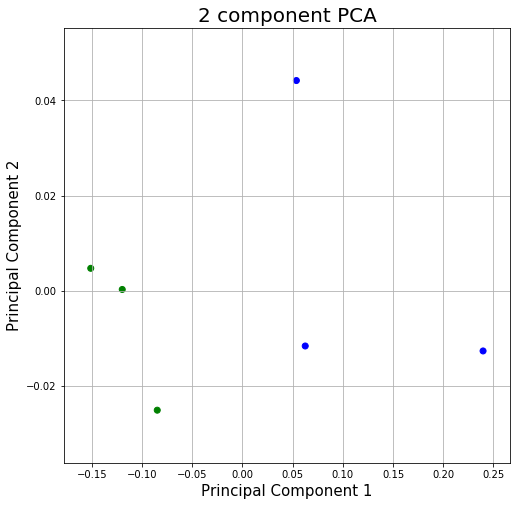

In [73]:
# plotting data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['component 1'], principalDf['component 2'], c= ['b','b','b','g','g','g'])
ax.grid()